In [68]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [69]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [70]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [71]:
yes_no_map = {
    'Yes': True,
    'No': False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
    star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)
    
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
    star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)

In [72]:
episode_cols = star_wars.columns[3:9].tolist()
rename_map = {}

for i, col in enumerate(episode_cols):
    rename_map[col] = 'seen_'+str(i+1)
    value_map = {
        star_wars[col].value_counts().index[0]: True,
        float('nan'): False
    }
    star_wars[col] = star_wars[col].map(value_maps[col])
    
star_wars = star_wars.rename(columns=rename_map)

In [73]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
rename_map = {col: 'ranking_'+str(i+1) for i,col in enumerate(star_wars.columns[9:15])}
star_wars = star_wars.rename(columns=rename_map)

# Analyzing survey

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
rankings = ['ranking_'+str(i+1) for i in range(0,6)]
scores = ['score'+str(i+1) for i in range(0,6)]

star_wars[scores] = 1 - star_wars[rankings] / 6

<Container object of 6 artists>

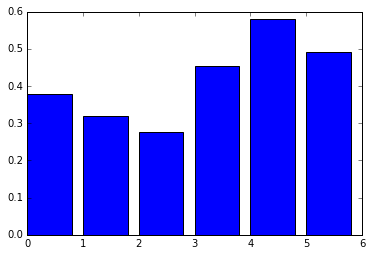

In [105]:
plt.bar(range(0,6),star_wars[scores].mean())

Barplot indicates that, judging by the mean score, the most favourable movie is the 5-th episode.

<Container object of 6 artists>

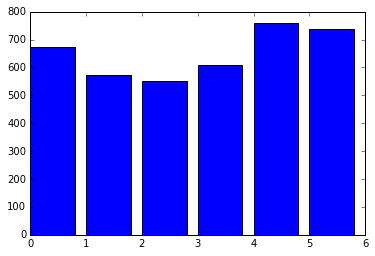

In [106]:
plt.bar(range(0,6),star_wars[star_wars.columns[3:9]].sum())

### Let's explore the correlation in ranking with how many movies were seen by a respondent

In [107]:
star_wars['seen'] = star_wars[star_wars.columns[3:9]].sum(axis=1).astype(float)

In [108]:
correlations = star_wars.corr()
correlations = correlations['seen'][scores]

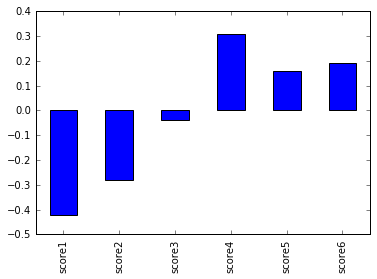

In [112]:
correlations.plot.bar()

The correlation numbers indicate that the more movies respondents have seen, the more value they put in original trilogy.

In [113]:
star_wars_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]
star_wars_non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]

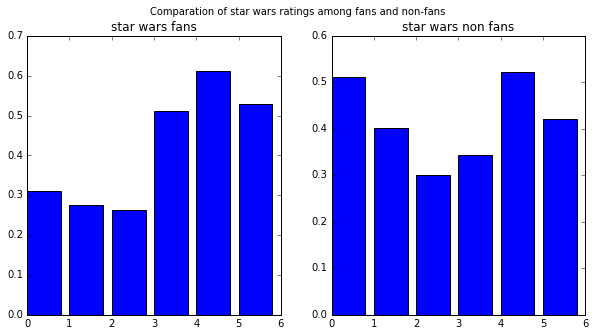

In [116]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Comparation of star wars ratings among fans and non-fans')

ax1 = fig.add_subplot(1,2,1)
ax1.bar(range(0,6),star_wars_fans[scores].mean())
ax1.set_title('star wars fans')

ax2 = fig.add_subplot(1,2,2)
ax2.bar(range(0,6),star_wars_non_fans[scores].mean())
ax2.set_title('star wars non fans')

plt.show()

Unsurprisingly, star wars fans prefer original trilogy over prequels

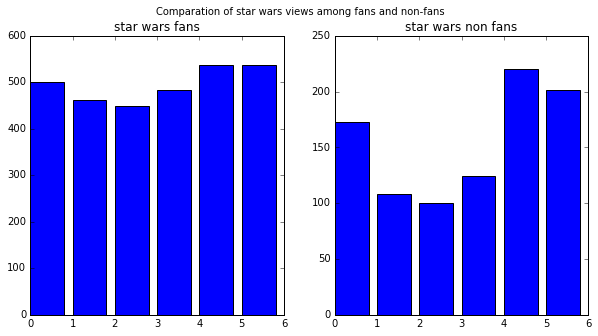

In [117]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Comparation of star wars views among fans and non-fans')

ax1 = fig.add_subplot(1,2,1)
ax1.bar(range(0,6),star_wars_fans[star_wars_fans.columns[3:9]].sum())
ax1.set_title('star wars fans')

ax2 = fig.add_subplot(1,2,2)
ax2.bar(range(0,6),star_wars_non_fans[star_wars_non_fans.columns[3:9]].sum())
ax2.set_title('star wars non fans')

plt.show()

Unsurprisingly, star wars fans have seen all movies almost equally.